# Section 2.2 — Multiple random variables

This notebook contains all the code examples from [Section 2.2 Multiple random variables](https://minireference.com/static/excerpts/noBSstats/noBSstats_ch02_PROB.pdf#page=40) in the **No Bullshit Guide to Statistics**.



#### Notebook setup

In [1]:
# Ensure required Python modules are installed
%pip install --quiet numpy scipy seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# load Python modules
import numpy as np               # numerical calculations
import matplotlib.pyplot as plt  # generic plotting functions
import seaborn as sns            # plotting distributions

In [3]:
# Figures setup
plt.clf()  # needed otherwise `sns.set_theme` doesn't work
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc={"font.family": "serif",
        "font.serif": ["Palatino", "DejaVu Serif", "serif"],
        "figure.figsize": (7,4)},
)
%config InlineBackend.figure_format = 'retina'

<Figure size 640x480 with 0 Axes>

In [4]:
# Simple float __repr__  
import numpy as np
if int(np.__version__.split(".")[0]) >= 2:
    np.set_printoptions(legacy='1.25')

# set random seed for repeatability
np.random.seed(42)

## Definitions

#### Example 1: two coin tosses

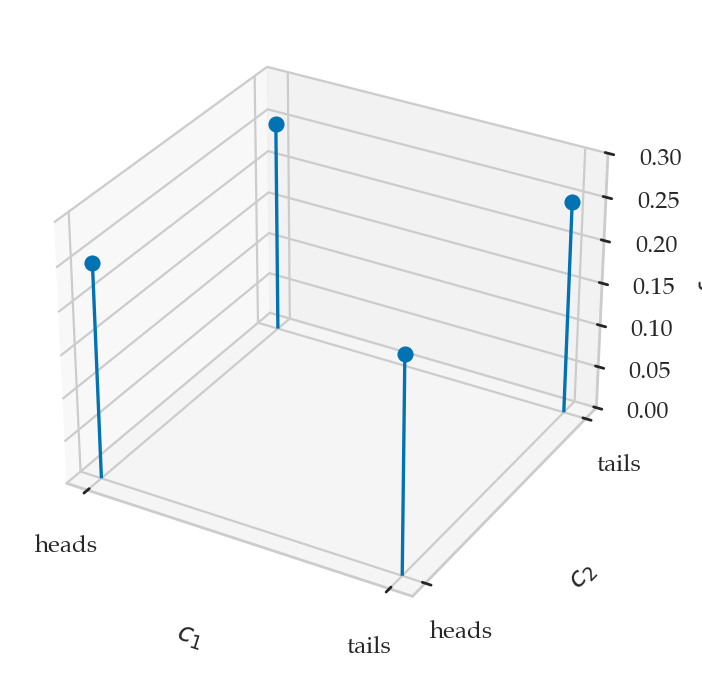

In [5]:
def fC(c):
    if c in ["heads", "tails"]:
        return 1/2
    else:
        return 0

def fC1C2(c1,c2):
    return fC(c1) * fC(c2)

xs, ys, fXYs = [], [], []
map_int_to_label = {0: "heads", 1: "tails"}
for x in range(0,1+1):
    for y in range(0,1+1):
        xs.append(x)
        ys.append(y)
        fXYxy = fC1C2(map_int_to_label[x], map_int_to_label[y])
        fXYs.append(fXYxy)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.stem(xs, ys, fXYs, basefmt=" ")
ax.set_xticks([0,1])
ax.set_xticklabels(["heads", "tails"])
ax.set_yticks([0,1])
ax.set_yticklabels(["heads", "tails"])
ax.set_xlabel("$c_1$")
ax.set_ylabel("$c_2$")
ax.set_zlabel("$f_{C_1C_2}$")
ax.set_zlim([0, 0.3]);

#### Example 2: rolling two dice

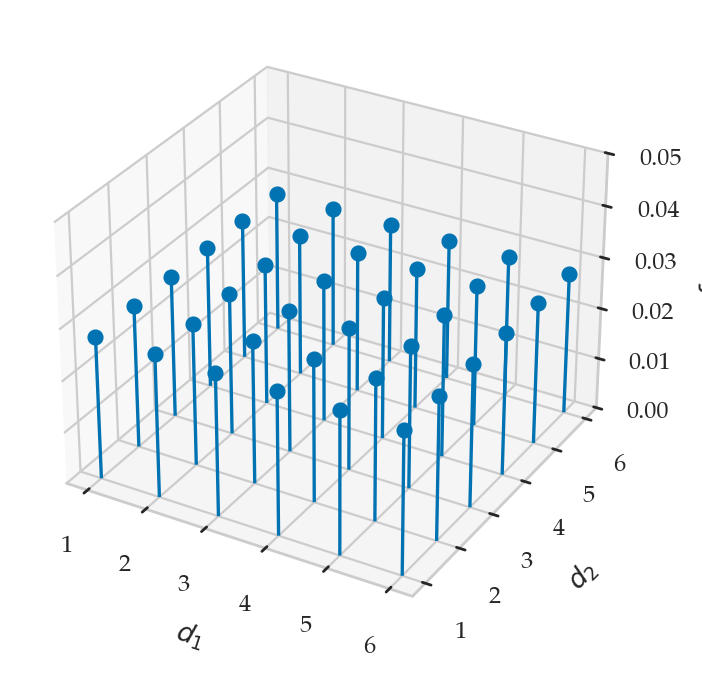

In [6]:
def fD(d):
    if d in [1,2,3,4,5,6]:
        return 1/6
    else:
        return 0

def fD1D2(d1,d2):
    return fD(d1) * fD(d2)

xs, ys, fXYs = [], [], []
for x in range(1,6+1):
    for y in range(1,6+1):
        xs.append(x)
        ys.append(y)
        fXYxy = fD1D2(x,y)
        fXYs.append(fXYxy)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.stem(xs, ys, fXYs, basefmt=" ")
ax.set_xlabel("$d_1$")
ax.set_ylabel("$d_2$")
ax.set_zlabel("$f_{D_1D_2}$")
ax.set_zlim([0, 0.05]);

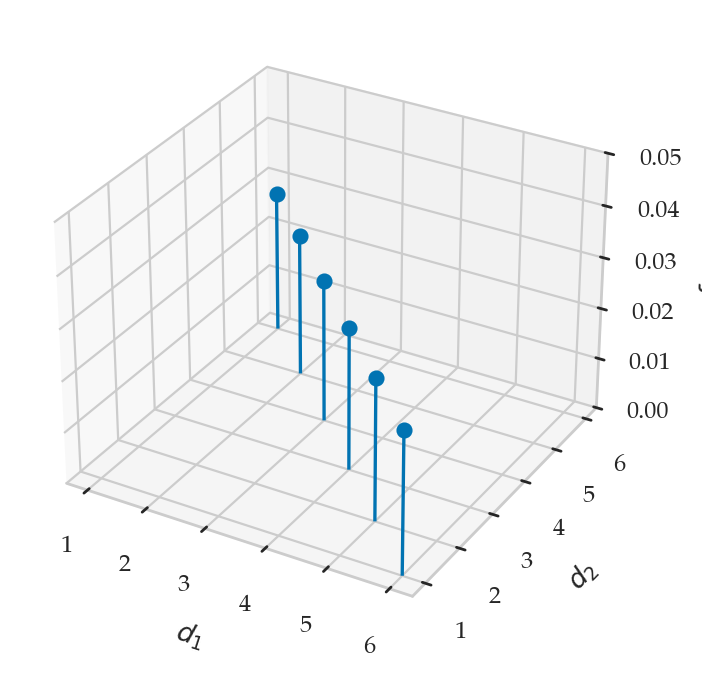

In [7]:
# PLOT D_1 + D_2 = 7
xs, ys, fXYs = [], [], []
for x in range(1,6+1):
    y = 7 - x
    xs.append(x)
    ys.append(y)
    fXYxy = fD1D2(x,y)
    fXYs.append(fXYxy)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.stem(xs, ys, fXYs, basefmt=" ")
ax.set_xlabel("$d_1$")
ax.set_ylabel("$d_2$")
ax.set_zlabel("$f_{D_1D_2}$")
ax.set_zlim([0, 0.05]);

#### Example 3: coin-dependent dice roll

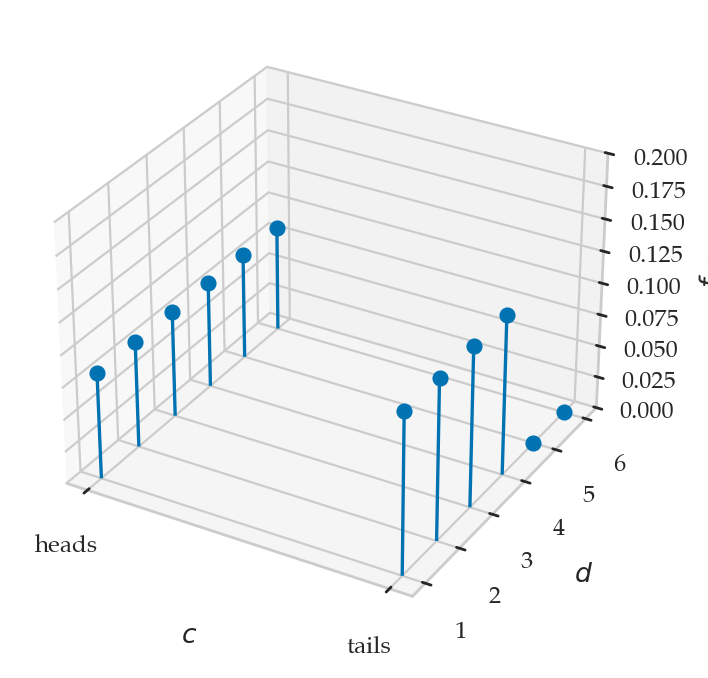

In [8]:
def fC(c):
    if c in ["heads", "tails"]:
        return 1/2
    else:
        return 0

def fD(d):
    if d in [1,2,3,4,5,6]:
        return 1/6
    else:
        return 0

def fD4(d):
    if d in [1,2,3,4]:
        return 1/4
    else:
        return 0

def fCD(c,d):
    if c == "heads":
        return fC(c) * fD(d)
    elif c == "tails":
        return fC(c) * fD4(d)


xs, ys, fXYs = [], [], []
map_int_to_label = {0: "heads", 1: "tails"}
for x in range(0,1+1):
    for y in range(1,6+1):
        xs.append(x)
        ys.append(y)
        fXYxy = fCD(map_int_to_label[x],y)
        fXYs.append(fXYxy)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.stem(xs, ys, fXYs, basefmt=" ")
ax.set_xticks([0,1])
ax.set_xticklabels(["heads", "tails"])
ax.set_xlabel("$c$")
ax.set_ylabel("$d$")
ax.set_zlabel("$f_{CD}$")
ax.set_zlim([0, 0.2]);

In [9]:
fXYs

[0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.125,
 0.125,
 0.125,
 0.125,
 0.0,
 0.0]

In [10]:
sum(fXYs)

1.0

In [11]:
# f_{Y|X}(y|heads)  [as a list]
[fCD("heads",d) for d in range(1,6+1)]

[0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333]

In [12]:
# f_{Y|X}(y|tails)  [as a list]
[fCD("tails",d) for d in range(1,6+1)]

[0.125, 0.125, 0.125, 0.125, 0.0, 0.0]

In [13]:
# f_Y(y)    [as a list]
fYs = [fCD("heads",d)+fCD("tails",d) for d in range(1,6+1)]
fYs

[0.20833333333333331,
 0.20833333333333331,
 0.20833333333333331,
 0.20833333333333331,
 0.08333333333333333,
 0.08333333333333333]

In [14]:
# # ALT. compute f_{Y|X}(y|heads)*0.5 + f_{Y|X}(y|tails)*0.5
# fYs = [fD(d)*0.5+fD4(d)*0.5 for d in range(1,6+1)]
# fYs

In [15]:
sum(fYs)

0.9999999999999999

#### Example 4: diagnostic test

In [16]:
def fV(v):
    if v == 1:
        return 0.03
    elif v == 0:
        return 0.97

def fTgivenV1(t):
    if t == 1:
        return 0.90
    elif t == 0:
        return 0.10

def fTgivenV0(t):
    if t == 1:
        return 0.20
    elif t == 0:
        return 0.80

def fTgivenV(t,v):
    if v == 1:
        return fTgivenV1(t)
    elif v == 0:
        return fTgivenV0(t)

def fVT(v,t):
    return fV(v)*fTgivenV(t,v)

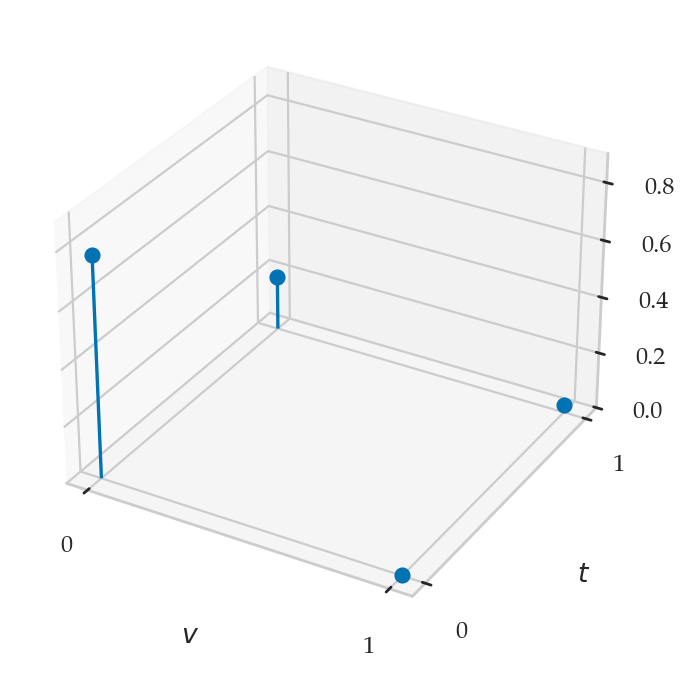

In [17]:
vs, ts, fVTs = [], [], []
for v in range(0,1+1):
    for t in range(0,1+1):
        vs.append(v)
        ts.append(t)
        fVTvt = fVT(v,t)
        fVTs.append(fVTvt)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.stem(vs, ts, fVTs, basefmt=" ", bottom=0.0)
ax.set_xticks([0,1])
ax.set_xlabel("$v$")
ax.set_yticks([0,1])
ax.set_ylabel("$t$")
ax.set_zlabel("$f_{VT}$")
ax.set_zlim([0, 0.9]);

In [18]:
# f_T(0) = 
0.8 * 0.97 + 0.10 * 0.03

0.779

In [19]:
# f_T(1) = 
0.2 * 0.97 + 0.90 * 0.03

0.221

In [20]:
for t in range(0,1+1):
    fVTt = fVT(0,t) + fVT(1,t)
    print("Pr({T="+str(t)+"}) =", fVTt)

Pr({T=0}) = 0.779
Pr({T=1}) = 0.221


In [21]:
for v in range(0,1+1):
    for t in range(0,1+1):
        fVTvt = fVT(v,t)
        print("Pr({V="+str(v) + ",T="+str(t)+"}) =",
              fTgivenV(t,v), "*", fV(v), "=", fVTvt)

Pr({V=0,T=0}) = 0.8 * 0.97 = 0.776
Pr({V=0,T=1}) = 0.2 * 0.97 = 0.194
Pr({V=1,T=0}) = 0.1 * 0.03 = 0.003
Pr({V=1,T=1}) = 0.9 * 0.03 = 0.027


#### Example 4: diagnostic test (continued)

We're now interested in $f_{V|T}(v|t)$,
which we can obtain using Bayes' theorem.

$$
    f_{V|T}(v|t)
        = \frac{ f_{T|V}(t|v) f_V(v) }{ f_{T|V}(t|0) f_V(0) + f_{T|V}(t|1) f_V(1)}.
$$

We'll now define the function `fVgivenT` that computes the numerator
and denominator in this fraction,
and returns the ratio.

In [22]:
def fVgivenT(v,t):
    num = fTgivenV(t,v) * fV(v)
    denom = fTgivenV(t,0) * fV(0) + fTgivenV(t,1) * fV(1)
    return num/denom

The probability of the patient having the virus $f_{V|T}(1|t=1)$,
given they tested positive is:

In [23]:
fVgivenT(1,1)

0.12217194570135746

Intuitively,
this percentage is measuring the ratio of the probability of the outcome $f_{VT}(1,1)$
divided by sum of the probabilities of all outcomes where positive test can occur:
$f_{VT}(1,1)+f_{VT}(0,1)$.

In [24]:
fVT(1,1) / (fVT(0,1) + fVT(1,1))

0.12217194570135746

## Define datasets for the examples

### Example 1: Multivariable uniform

In [25]:
xmin = 100
xmax = 200
ymin = 10
ymax = 20

# joint pdf of = randint(100, 200) x randint(10,20)
def fU(x,y):
    A = (xmax-xmin) * (ymax-ymin)
    if xmin <= x and x <= xmax and ymin <= y and y <= ymax:
        return 1/A
    else:
        return 0.0

In [26]:
fU(170,12)

0.001

## Discussion

### Dependence and independence

## Exercises

### Exercise: infer the coin output from the die roll

$$
 f_{X|Y}(\texttt{heads}|4) = \frac{ f_{Y|X}(4|\texttt{heads}) f_X(\texttt{heads}) }{ f_Y(4) }
$$

In [27]:
fD(4) * fC("heads") / fYs[3]

0.4